In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as models
import sklearn.tree as trees
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

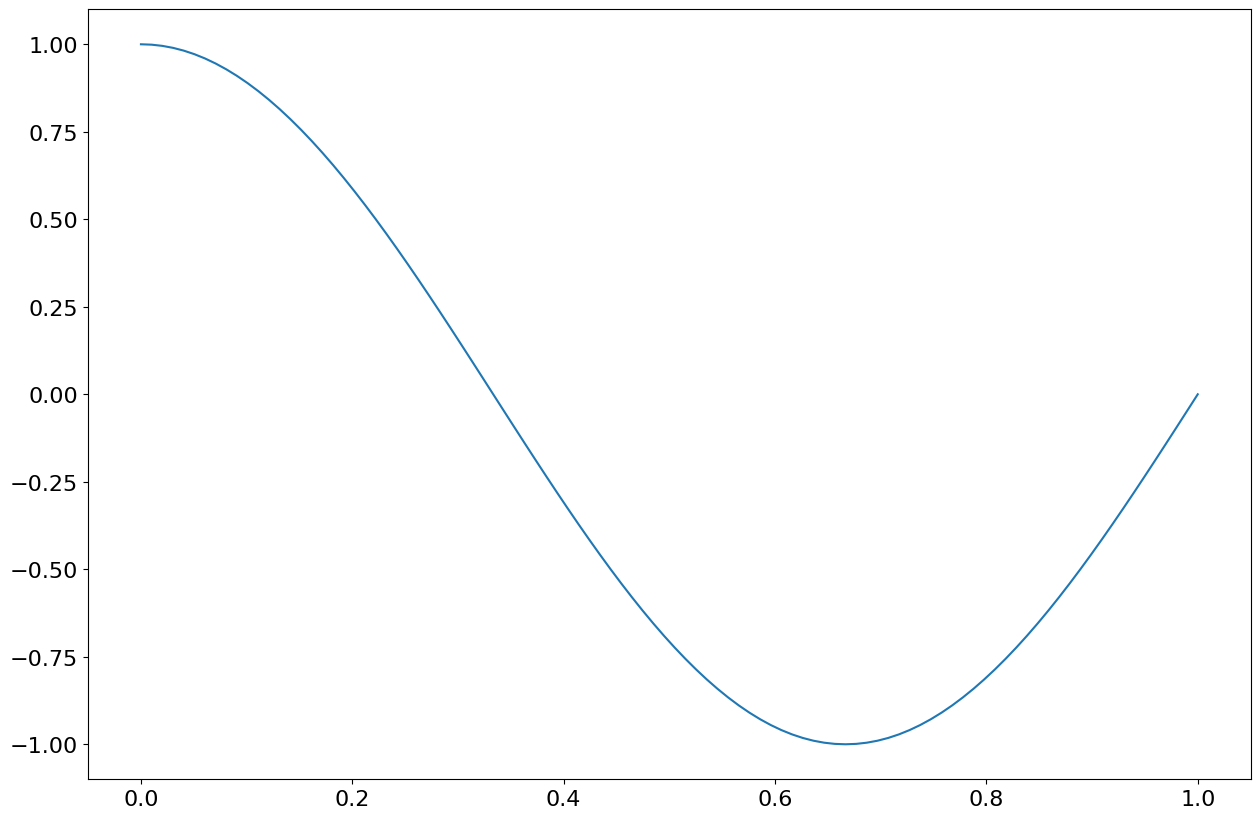

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
plt.plot(np.linspace(0, 1, 100), true_fun(np.linspace(0, 1, 100)))
plt.show()

In [ ]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y, edgecolor='b', s=20)
plt.show()

In [ ]:
depths = [1, 2, 5, 10, 20, 100]
plt.figure(figsize=(30, 8))
for i in range(len(depths)):
    ax = plt.subplot(1, len(depths), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    regression = trees.DecisionTreeRegressor(max_depth=depths[i])
    regression.fit(X[:, np.newaxis], y)

    scores = cross_val_score(regression, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, regression.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Depth {}\nMSE = {:.2e}(+/- {:.2e})".format(depths[i], -scores.mean(), scores.std()))
plt.show()